## Mahalakshmi.S

# Task-03 Exploratory Data Analysis 

### Import Libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

### Load and Read Dataset

In [7]:
ss=pd.read_csv('SampleSuperstore.csv')

In [8]:
ss.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
ss.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Correlation Map

<AxesSubplot:>

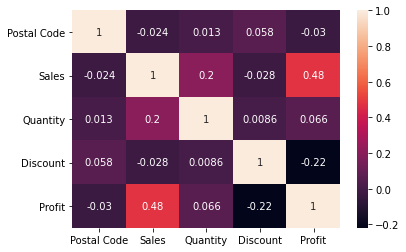

In [10]:
correlation=ss.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,fmt='.2g', annot_kws=None, linewidths=0, linecolor='white',annot=True)

In [11]:
ss.drop_duplicates(inplace=True)

### Group By ShipMode

In [12]:
grby=ss.groupby(['Ship Mode'],as_index=False)['Profit'].sum()
grby

,Ship Mode,Profit
0,First Class,48953.6561
1,Same Day,15871.8869
2,Second Class,57446.6516
3,Standard Class,163969.2280


### Visualization through plotly

In [13]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### Visualize  Ship Mode  Profit

In [15]:
grby.iplot(kind = 'bar', x = 'Ship Mode', y = 'Profit', title = 'Ship mode wise Profit', xTitle='Ship Mode', yTitle='Total Profit',barmode='stack', bargap=0.7,color='black')

### Group by Category 

In [16]:
grby_cat=ss.groupby(['Category'],as_index=False)['Profit'].sum()
grby_cat.head()

,Category,Profit
0,Furniture,18421.8137
1,Office Supplies,122364.6608
2,Technology,145454.9481


### Visualize by Category with profit

In [17]:
import plotly.express as px
fig = px.bar(grby_cat, x='Category', y='Profit', text='Profit')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',bargap=0.7,title='Category wise profit')
fig.show()

### Group by SubCategory 

In [18]:
grby_sc=ss.groupby(['Sub-Category'],as_index=False)['Profit'].sum()
grby_sc.head()

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6524.6118
3,Binders,30228.0003
4,Bookcases,-3472.5560


### Visualize sub-category

In [19]:
fig = px.bar(grby_sc, x='Sub-Category', y='Profit', text='Profit')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',bargap=0.7,title='Sub-cateogry wise Profit')
fig.show()

### Groupby Region

In [20]:
grby_r=ss.groupby(['Region'],as_index=False)['Profit'].sum()
grby_r

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


### Visualize by variuous Region wise profit

In [21]:
import plotly.express as px

#df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(grby_r, y='Region', x='Profit', text='Profit')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',bargap=0.7,title='Region wise profit')
fig.show()

### Groupby State 

In [22]:
grby_s=ss.groupby(['State'],as_index=False)['Profit'].sum()
grby_s.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76330.7891
4,Colorado,-6527.8579


### Visualize State wise  profit

In [24]:

grby_s.iplot(kind = 'bar', x = 'State', y = 'Profit', title = 'State wise Profit', xTitle='State', yTitle='Total Profit',color='cyan')

### Groupby Segments 

In [25]:
grby_seg=ss.groupby(['Segment'],as_index=False).sum()
grby_seg.head()

,Segment,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,288269634,1.160833e+06,19497,820.51,134007.4413
1,Corporate,164108306,7.060701e+05,11591,476.85,91954.9798
2,Home Office,97903137,4.292927e+05,6732,261.83,60279.0015


### Visualize by Segment

In [26]:
grby_seg.iplot(kind = 'barh', x= 'Segment', y = 'Quantity', title = 'Segement Details', yTitle='Segment', xTitle='Quantity',color='pink',bargap=0.7)

In [27]:
grby1=ss.groupby(['City'],as_index=False)['Profit'].sum()
grby1.head()

,City,Profit
0,Aberdeen,6.6300
1,Abilene,-3.7584
2,Akron,-186.6356
3,Albuquerque,634.0881
4,Alexandria,318.6183


### Next:
<li>In the above I Can visualize through Plotly library But In python have wonderful predefined library toVisualization.
<li>Yeah, That is <div style ="color:red">**sweetviz and autoviz**</div>this two library are very helpful to Exploratory Data Analyis

## SWEETVIZ

In [29]:
advert_report = sv.analyze(ss)
#display the report
advert_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## AutoViz

In [36]:
from autoviz.AutoViz_Class import AutoViz_Class
av_c = AutoViz_Class()

Shape of your Data Set: (9994, 13)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    12 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables

################ Multi_Classification VISUALIZATION Started #####################


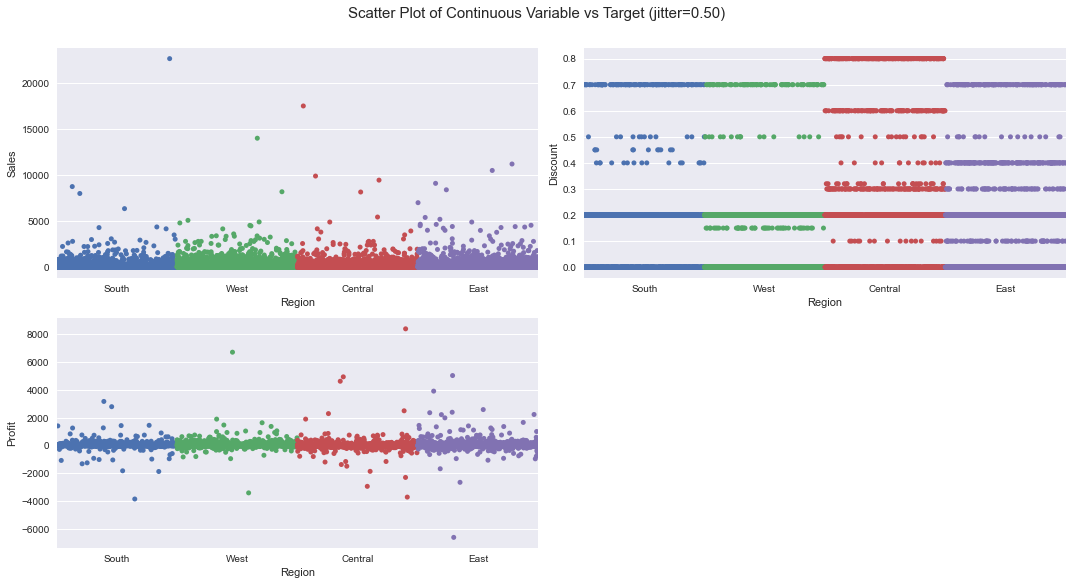

Total Number of Scatter Plots = 6


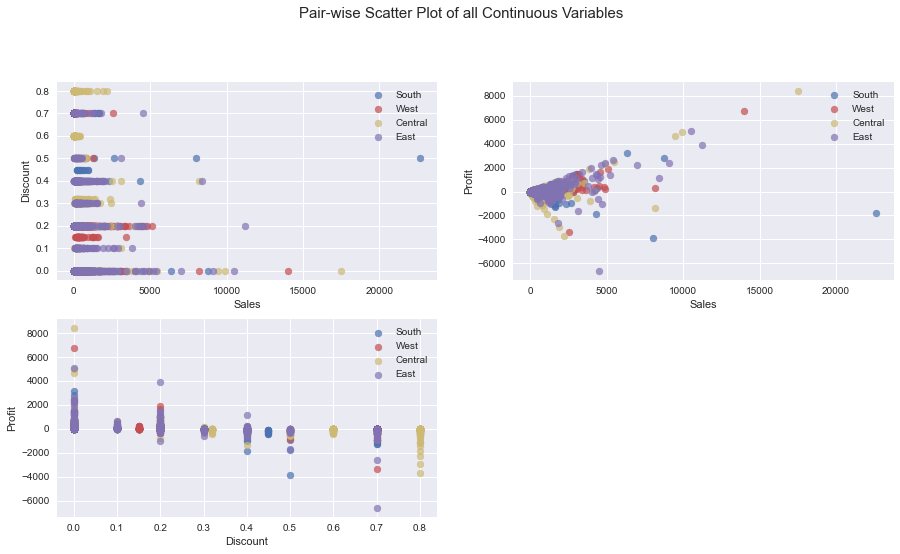

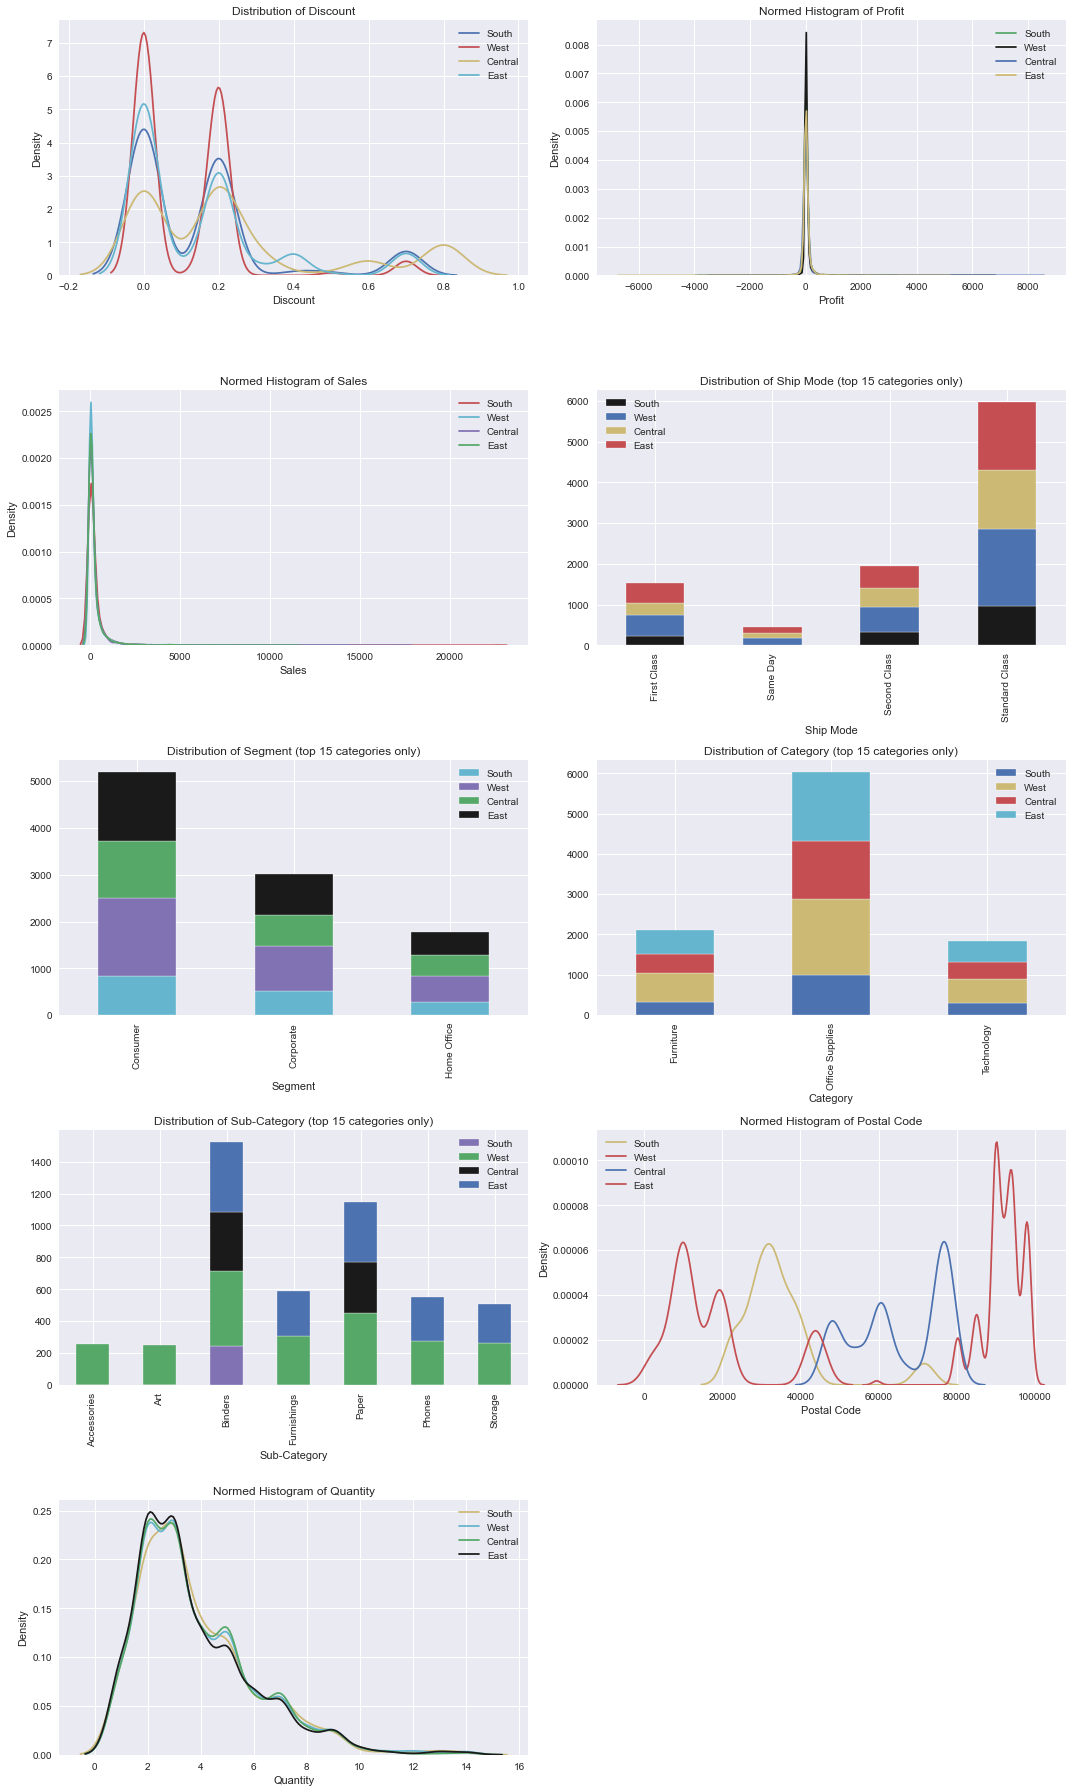

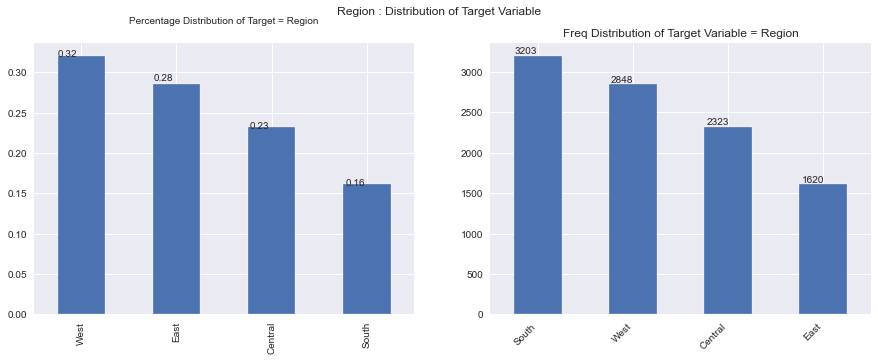

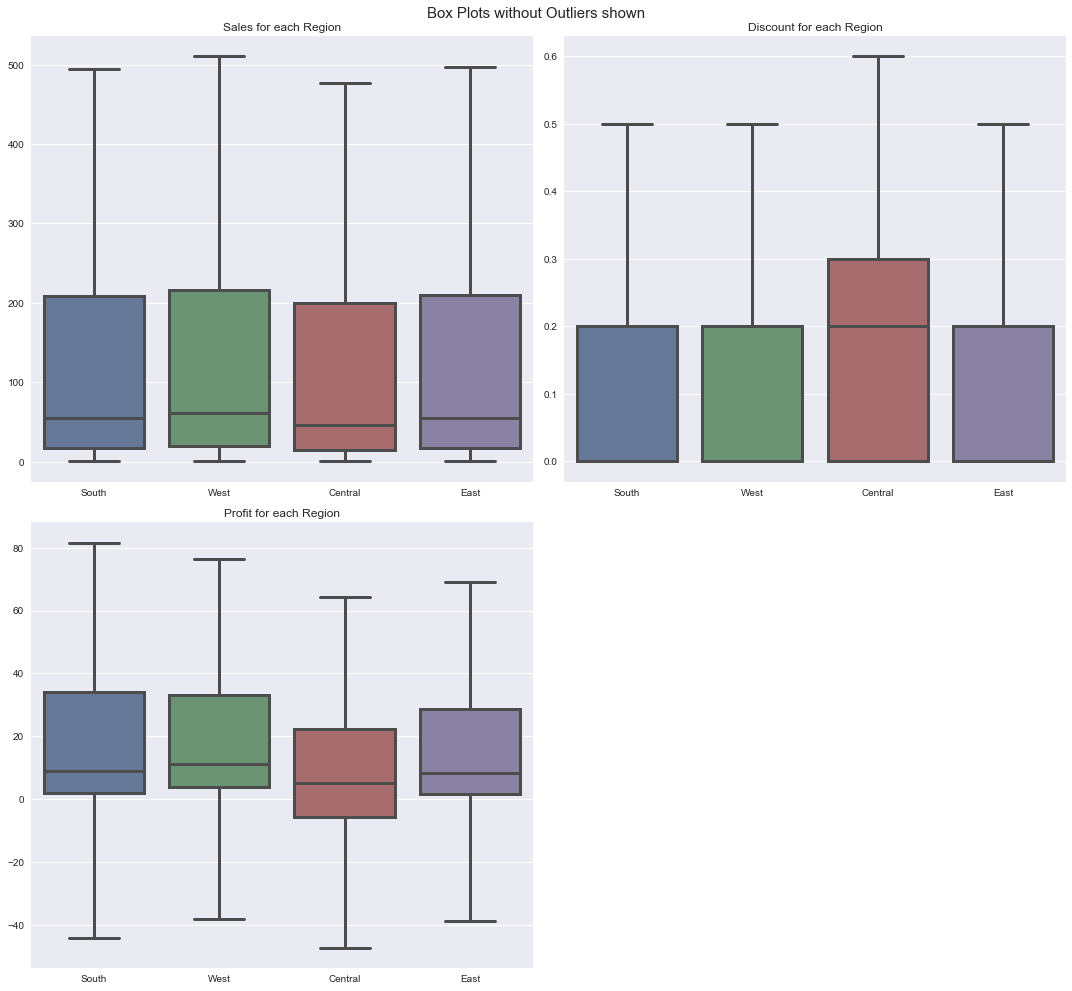

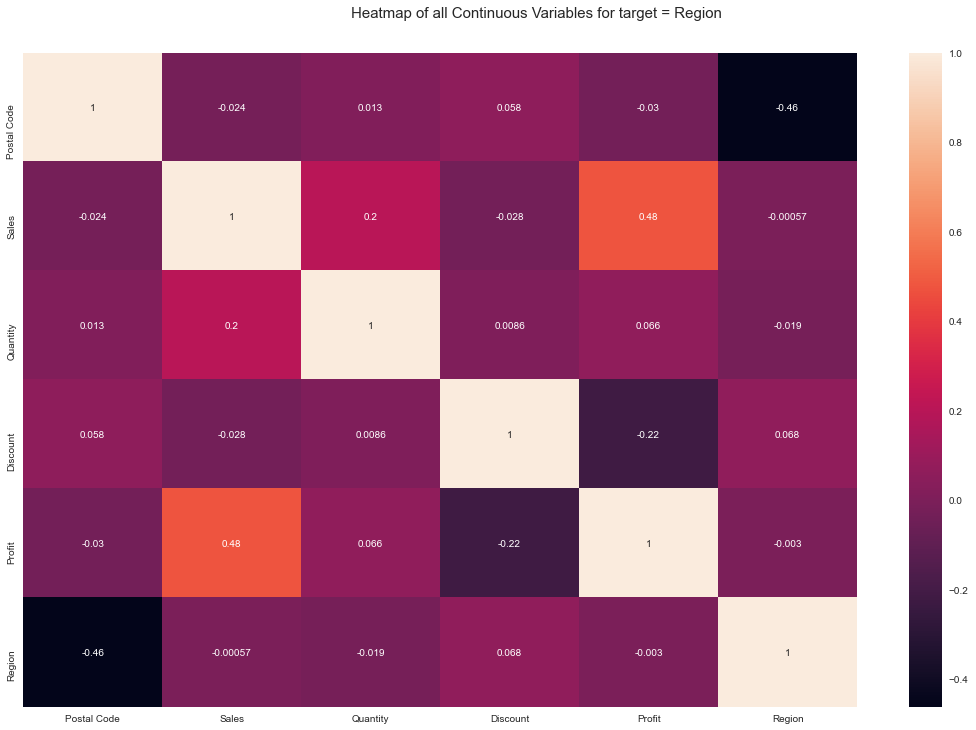

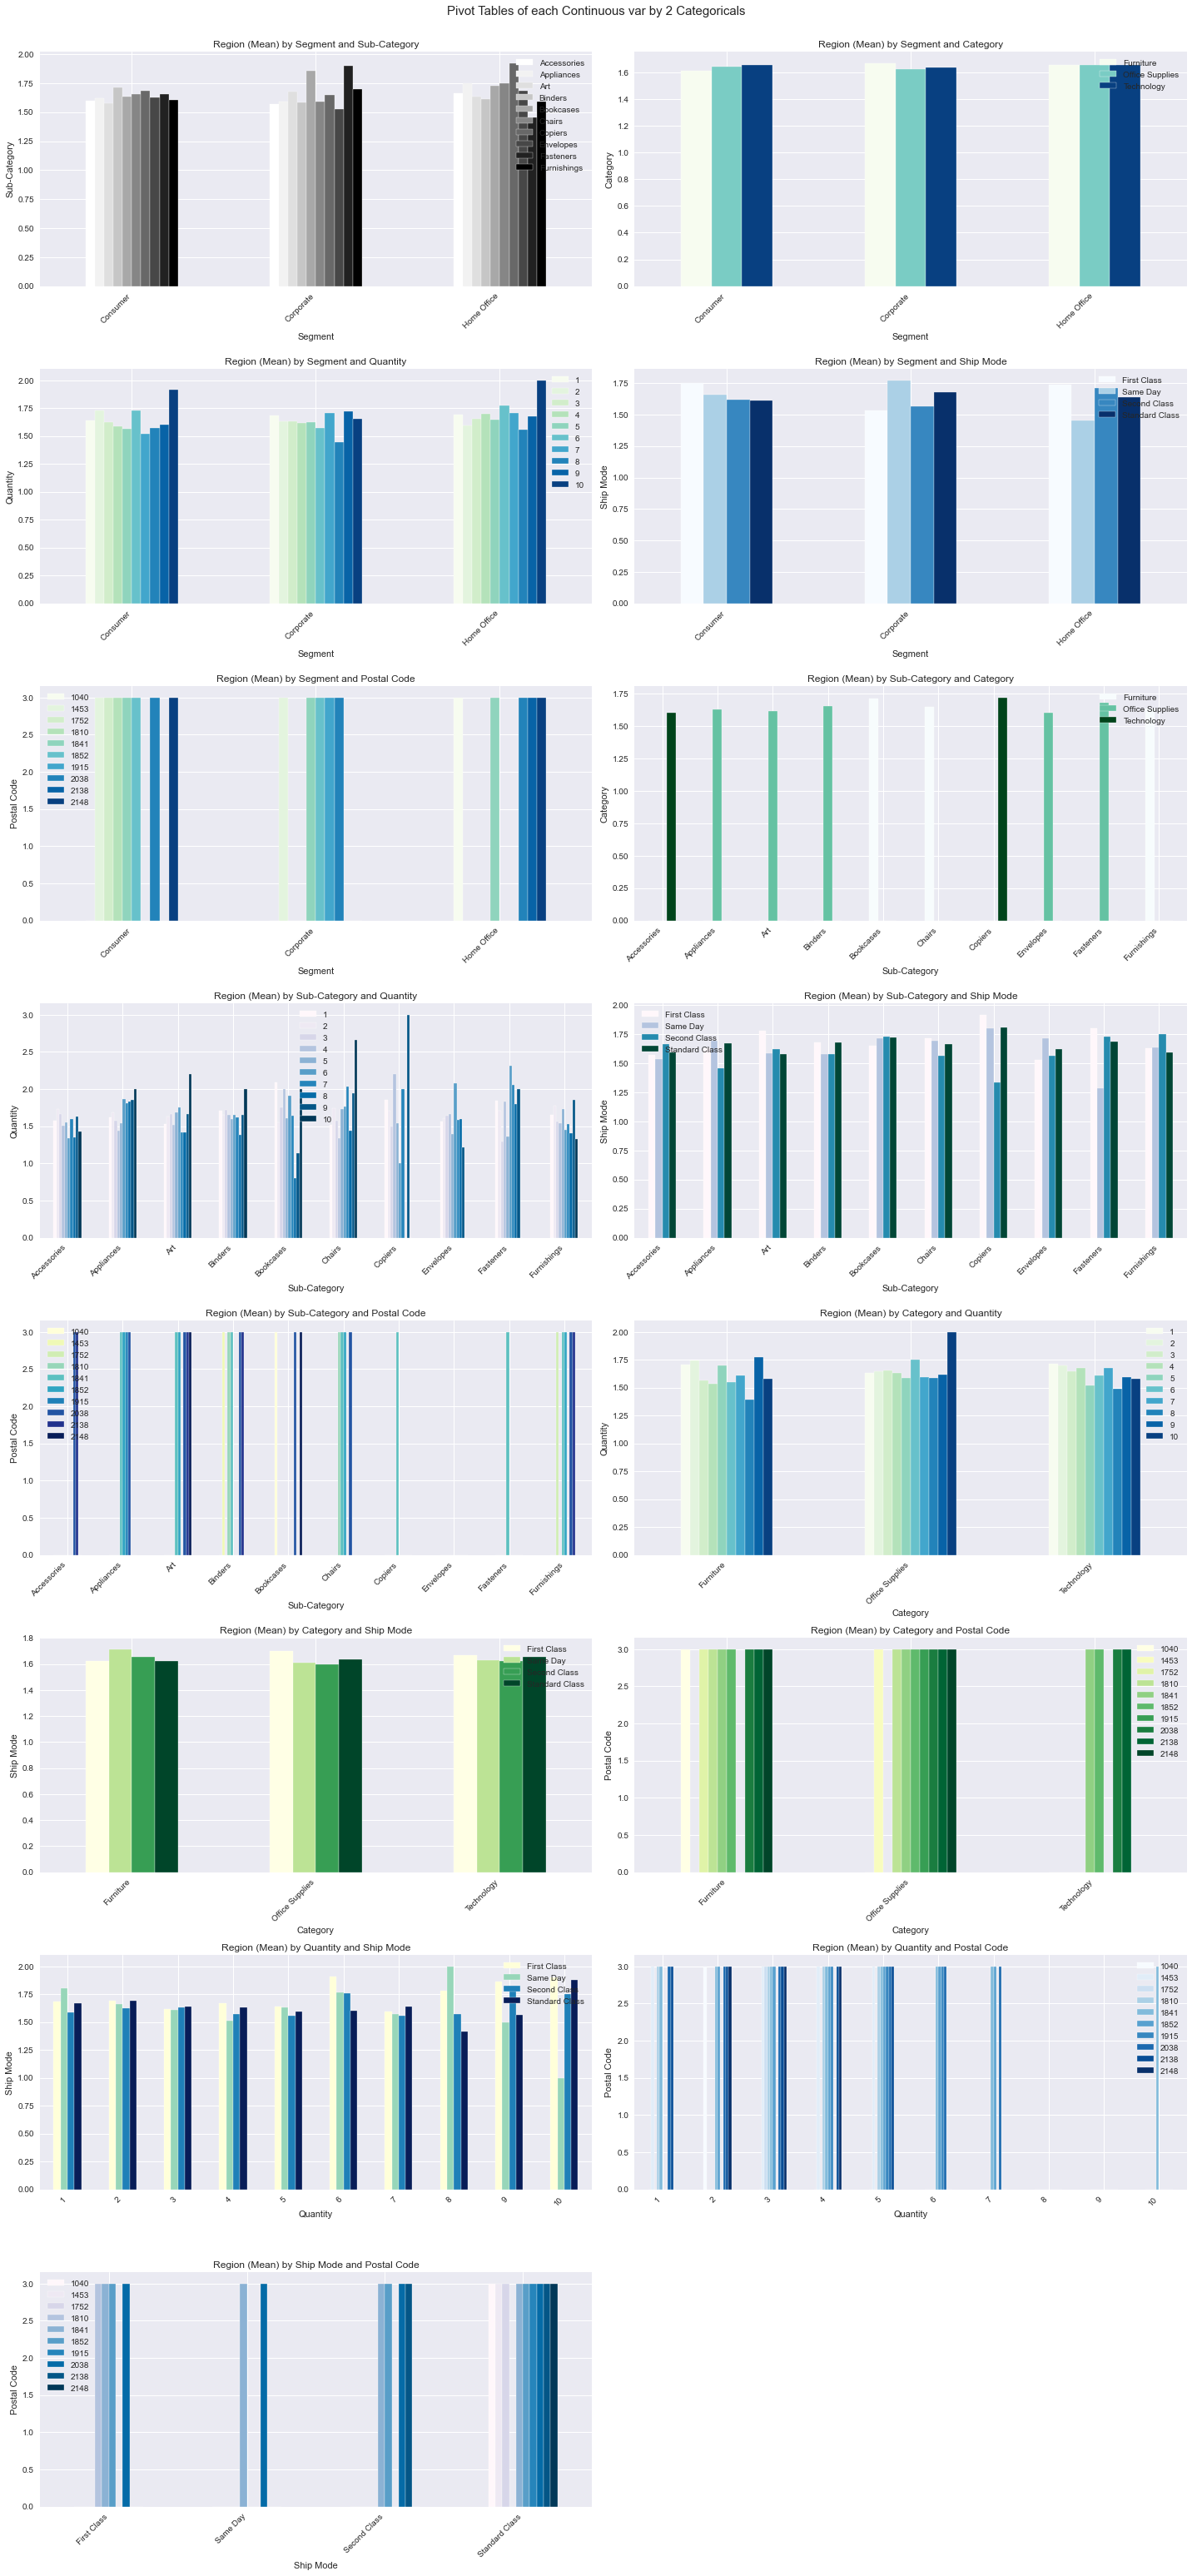

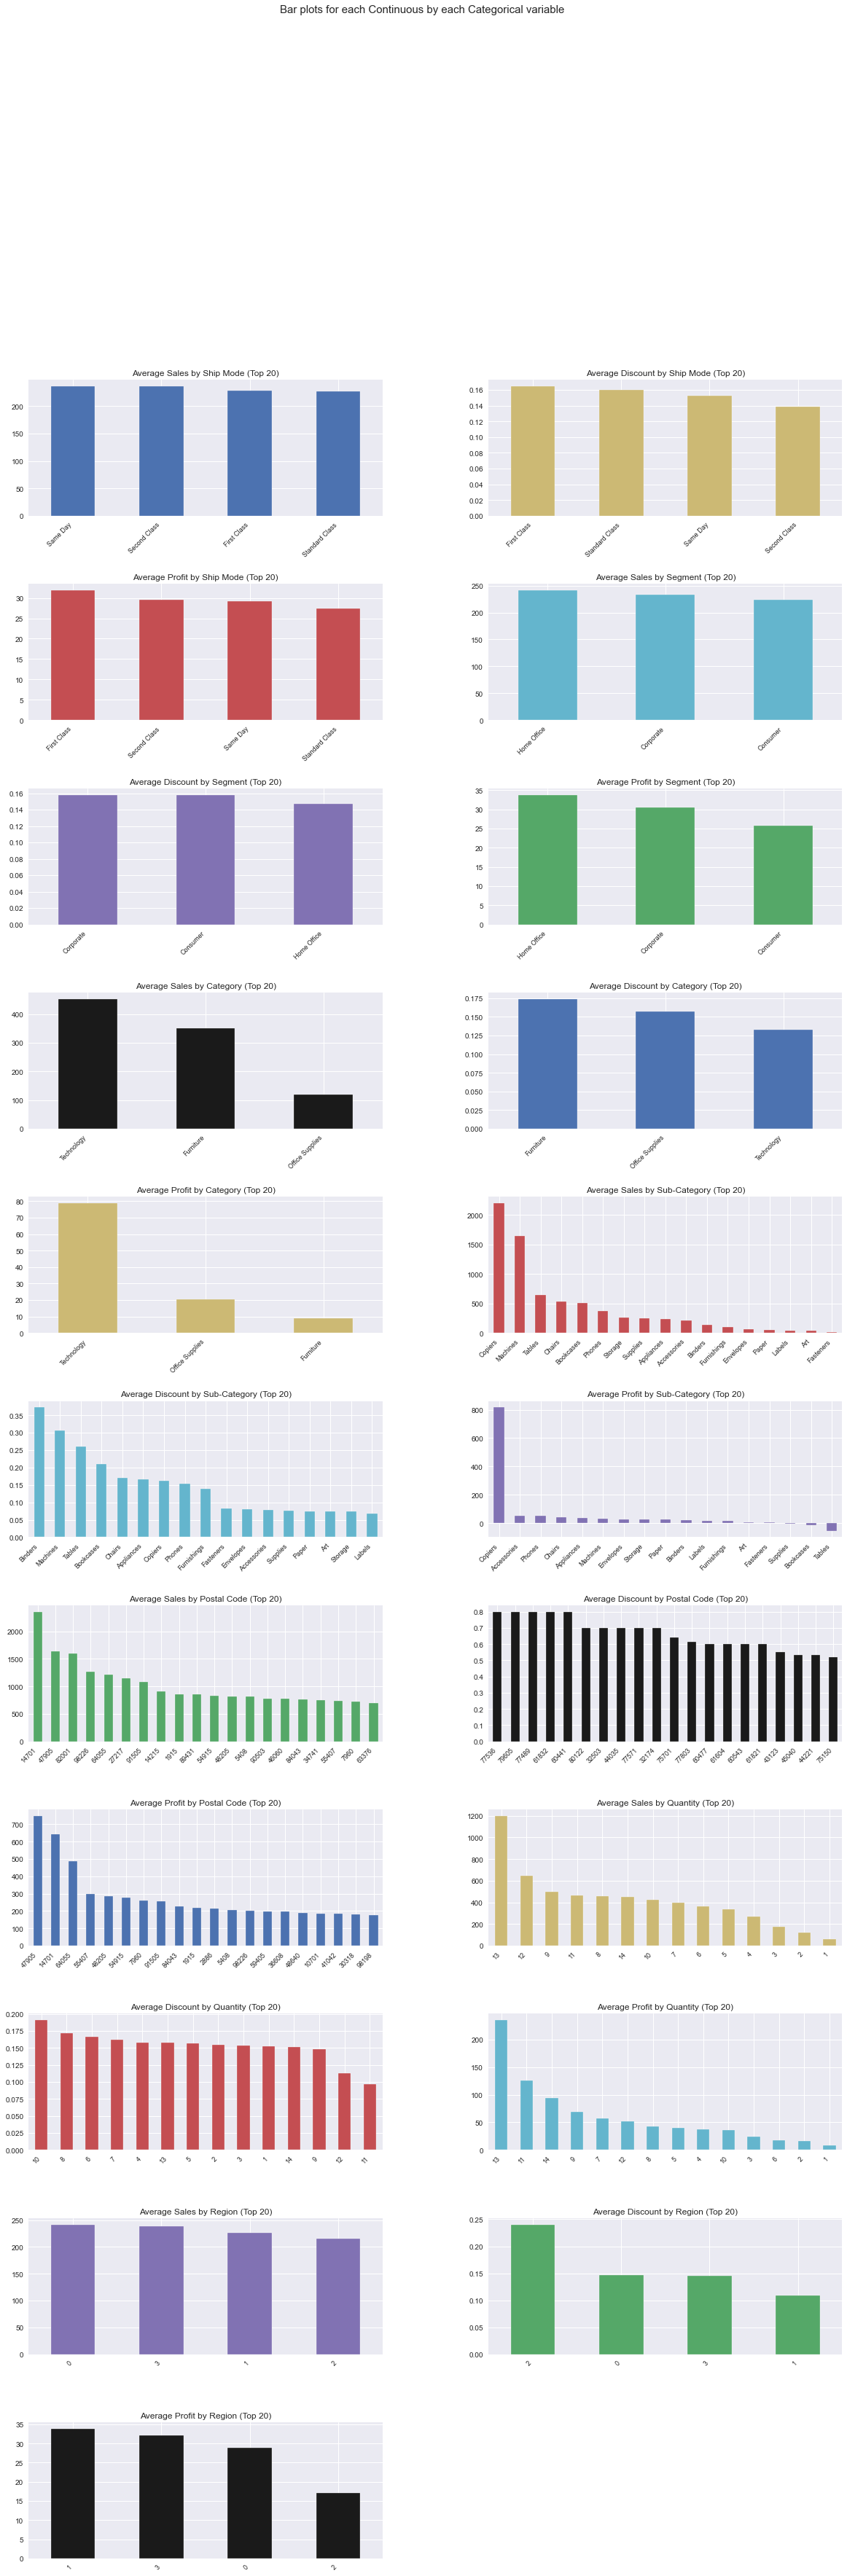

Time to run AutoViz (in seconds) = 28.874

 ###################### VISUALIZATION Completed ########################


In [37]:
ss = av_c.AutoViz('SampleSuperstore.csv',depVar='Region')

# Summary

### What I learned from my visualization?
<li><div style ="color:violet">**Center** region is profit low.</div> 
<li><div style ="color:black">**West virginia, wyoming and North dakota **is low profit</div>
<li><div style ="color:blue">In state wise **Texas** state is very loss</div>